In [33]:
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
dir = "/home/davidb/johnson/kinetic_trap_estimation/output/"

In [30]:
df_dict = {'n': [], 
           'autodiff_mode': [], 
           'exp_type': [], 
           'error': [], 
           'time': []}

for n, autodiff_mode, exp_type in it.product([3, 4, 5],
                                              ['rev', 'for'],
                                              ['yield', 'trap']):
    
    est_file = dir + f"n{n}_{autodiff_mode}_{exp_type}_est.txt"
    time_file = dir + f"n{n}_{autodiff_mode}_{exp_type}_times.txt"

    with open(est_file, 'r') as est_f:
        with open(time_file, 'r') as time_f:
            est_lines = est_f.readlines()
            time_lines = time_f.readlines()

            assert len(est_lines) == 2 * len(time_lines)

            for line_num in range(0, len(est_lines), 2):
                true_vals = [float(p) for p in est_lines[line_num].split()[1:]]
                est_vals = [float(p) for p in est_lines[line_num + 1].split()[1:]]
                mse = np.mean((np.array(true_vals) - np.array(est_vals)) ** 2)

                time = float(time_lines[line_num // 2].strip()) / 1e9

                df_dict['n'].append(str(n))
                df_dict['autodiff_mode'].append(autodiff_mode)
                df_dict['exp_type'].append(exp_type)
                df_dict['error'].append(mse)
                df_dict['time'].append(time)


In [47]:
df = pd.DataFrame(df_dict)
df['log_error'] = np.log10(df['error'])
df['log_time'] = np.log10(df['time'])
df['exp_and_mode'] = df['exp_type'] + '_' + df['autodiff_mode']
df.dtypes

n                 object
autodiff_mode     object
exp_type          object
error            float64
time             float64
log_error        float64
log_time         float64
exp_and_mode      object
dtype: object

/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

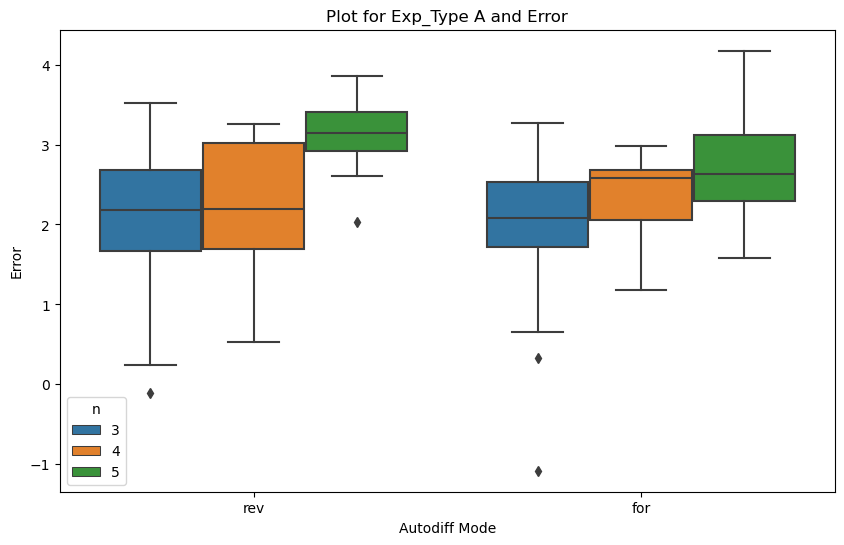

/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

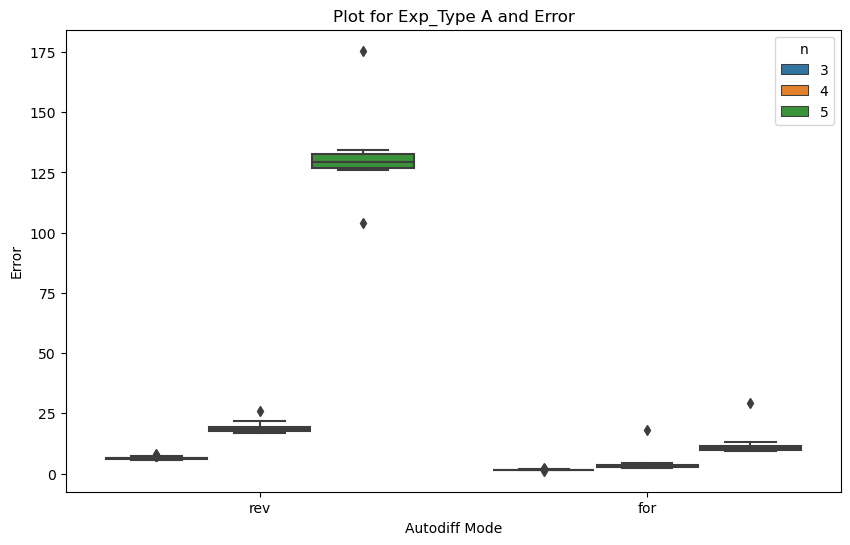

/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

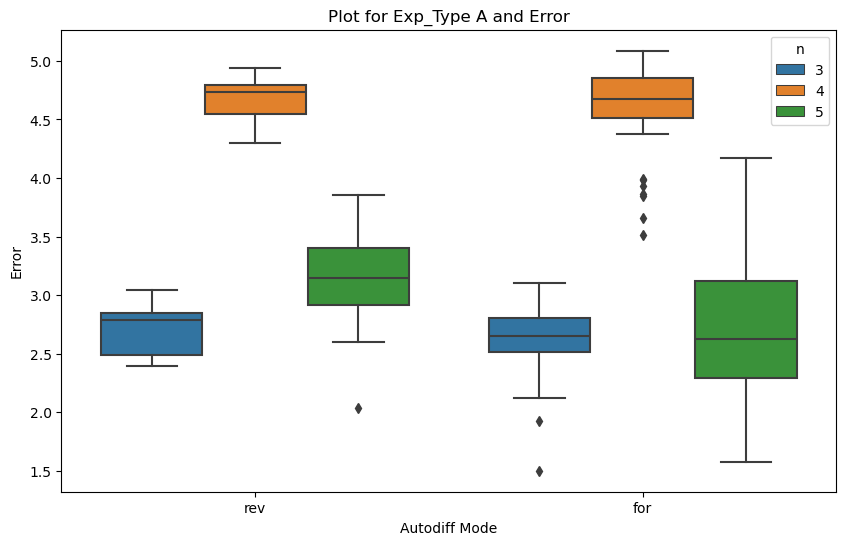

/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

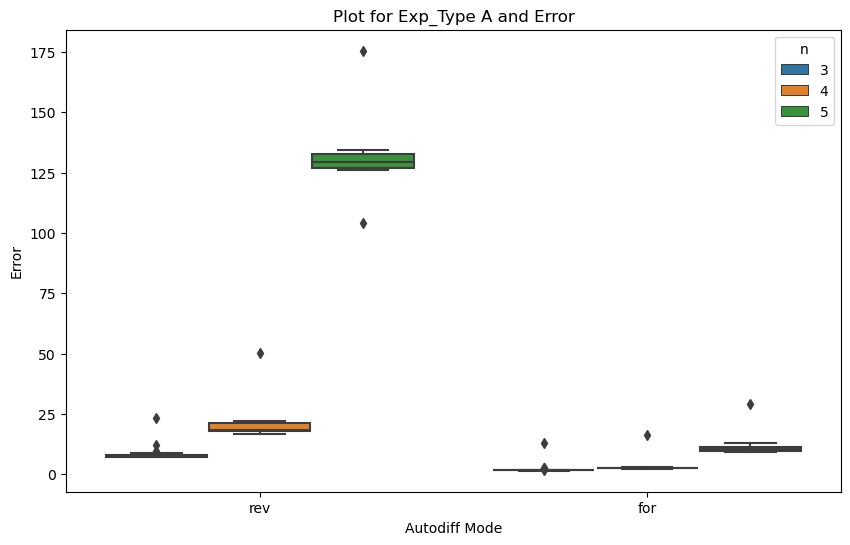

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='autodiff_mode', y='log_error', hue='n', data=df[df.exp_type == 'yield'], dodge=True)
plt.title("Plot for Exp_Type A and Error")
plt.xlabel("Autodiff Mode")
plt.ylabel("Error")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='autodiff_mode', y='time', hue='n', data=df[df.exp_type == 'yield'], dodge=True)
plt.title("Plot for Exp_Type A and Error")
plt.xlabel("Autodiff Mode")
plt.ylabel("Error")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='autodiff_mode', y='log_error', hue='n', data=df[df.exp_type == 'trap'], dodge=True)
plt.title("Plot for Exp_Type A and Error")
plt.xlabel("Autodiff Mode")
plt.ylabel("Error")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='autodiff_mode', y='time', hue='n', data=df[df.exp_type == 'trap'], dodge=True)
plt.title("Plot for Exp_Type A and Error")
plt.xlabel("Autodiff Mode")
plt.ylabel("Error")
plt.show()

/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/davidb/miniforge3/envs/di_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

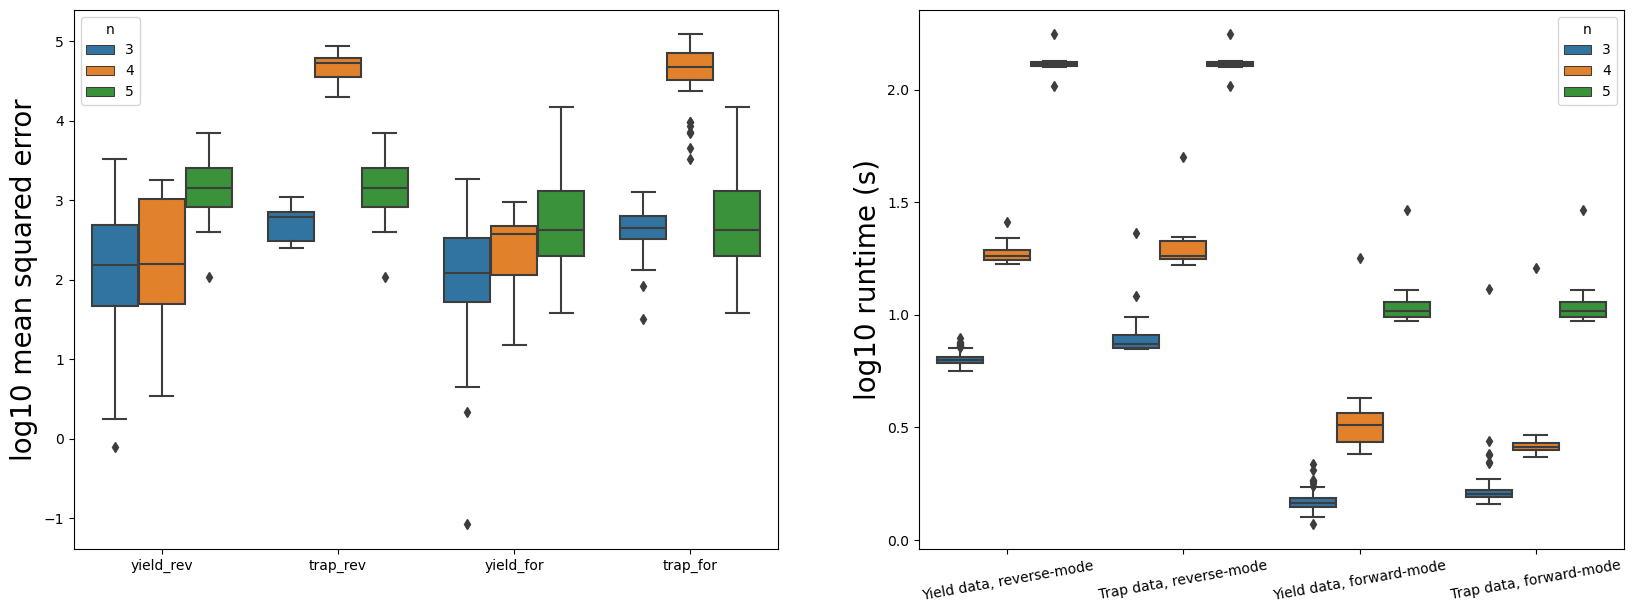

In [76]:
dpi = 400

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=dpi)
sns.boxplot(x='exp_and_mode', y='log_error', hue='n', data=df, dodge=True, ax=ax[0])
ax[0].set_ylabel("log10 mean squared error", fontdict={'fontsize':20})
ax[0].set_xlabel("")
ax[0].set_xticklabels(['Yield data, reverse-mode', 
                       'Trap data, reverse-mode', 
                       'Yield data, forward-mode', 
                       'Trap data, forward-mode'],
                       rotation=10)

sns.boxplot(x='exp_and_mode', y='log_time', hue='n', data=df, dodge=True, ax=ax[1])
ax[1].set_ylabel("log10 runtime (s)", fontdict={'fontsize':20})
ax[1].set_xlabel("")
ax[1].set_xticklabels(['Yield data, reverse-mode', 
                       'Trap data, reverse-mode', 
                       'Yield data, forward-mode', 
                       'Trap data, forward-mode'],
                       rotation=10)

plt.show()

In [65]:
df.to_csv("output/combined_output.csv")